In [604]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from scipy import stats
import lightgbm as lgb
from scipy.stats import mode
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import matplotlib.pyplot as plt


In [605]:
#read dataset
df = pd.read_csv("CreditPrediction.csv")
# df

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

In [569]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
count,1.016700e+04,10167.000000,10167.000000,9944.000000,10147.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,0.0
mean,7.391864e+08,46.753817,2.346513,35.913415,3.813245,2.341595,2.455887,8632.552346,1162.176748,0.759721,4402.349661,64.864463,0.712192,0.274716,NaN
std,3.690366e+07,13.520505,1.298701,7.980102,1.554741,1.010502,1.105580,9087.333842,815.082643,0.219054,3393.953441,23.461680,0.237934,0.275638,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130407e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2556.500000,348.500000,0.631000,2155.500000,45.000000,0.582000,0.022000,NaN
50%,7.179400e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,3900.000000,67.000000,0.702000,0.175000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1783.000000,0.859000,4740.000000,81.000000,0.818000,0.502500,NaN
max,8.283431e+08,352.330517,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [570]:
#removing unimportant features (using corr())

df = df.drop(['CLIENTNUM', 'Unnamed: 19', 'Total_Ct_Chng_Q4_Q1', 'Months_on_book', 'Education_Level', 'Marital_Status','Customer_Age','Contacts_Count_12_mon',
              'Months_Inactive_12_mon'], axis=1)

In [571]:
#calculating z_scores for featurs using z score and finaly drop them

z_score_dataset = pd.DataFrame()

z_score_dataset['Total_Trans_Amt'] = np.abs(stats.zscore(df['Total_Trans_Amt']))
outlAmt = list(np.where(np.abs(z_score_dataset['Total_Trans_Amt']) > 3)[0])
# print("Age Outliers: ", outlAmt)
df = df.drop(df.index[outlAmt])

print("Total outlier (Total_Trans_Amt): ", len(outlAmt), "\n")


z_score_dataset['Total_Trans_Ct'] = np.abs(stats.zscore(df['Total_Trans_Ct']))
outlct = list(np.where(np.abs(z_score_dataset['Total_Trans_Ct']) > 3)[0])
print("Total outlier (Total_Trans_Ct): ", len(outlct), "\n")
# print("Age Outliers: ", ououtlct)
df = df.drop(df.index[outlct])

Total outlier (Total_Trans_Amt):  395 

Total outlier (Total_Trans_Ct):  9 



In [572]:
#replacing lost datas with np.nan

lost_values = ["NaN", "Unknown", ""]
df.replace(lost_values, np.nan, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9763 entries, 0 to 10166
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    9568 non-null   object 
 1   Dependent_count           9763 non-null   int64  
 2   Income_Category           8673 non-null   object 
 3   Card_Category             7913 non-null   object 
 4   Total_Relationship_Count  9744 non-null   float64
 5   Credit_Limit              9763 non-null   float64
 6   Total_Revolving_Bal       9763 non-null   int64  
 7   Total_Amt_Chng_Q4_Q1      9763 non-null   float64
 8   Total_Trans_Amt           9763 non-null   int64  
 9   Total_Trans_Ct            9763 non-null   int64  
 10  Avg_Utilization_Ratio     9763 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 915.3+ KB


In [573]:
#deviding categorical features

categorical_features = df.select_dtypes(include=['object']).columns

In [574]:
#mapping the sequential features based on order

df['Income_Category'] = df['Income_Category'].map({"Less than $40K":0, "$40K - $60K":1, "$60K - $80K":2 ,"$80K - $120K":3, "$120K +":4})
df['Card_Category'] = df['Card_Category'].map({"Blue":0, "Silver":1, "Gold":2, "Platinum":3})
df['Gender'] = df['Gender'].map({"M":0, "F":1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9763 entries, 0 to 10166
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    9568 non-null   float64
 1   Dependent_count           9763 non-null   int64  
 2   Income_Category           8673 non-null   float64
 3   Card_Category             7913 non-null   float64
 4   Total_Relationship_Count  9744 non-null   float64
 5   Credit_Limit              9763 non-null   float64
 6   Total_Revolving_Bal       9763 non-null   int64  
 7   Total_Amt_Chng_Q4_Q1      9763 non-null   float64
 8   Total_Trans_Amt           9763 non-null   int64  
 9   Total_Trans_Ct            9763 non-null   int64  
 10  Avg_Utilization_Ratio     9763 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 915.3 KB


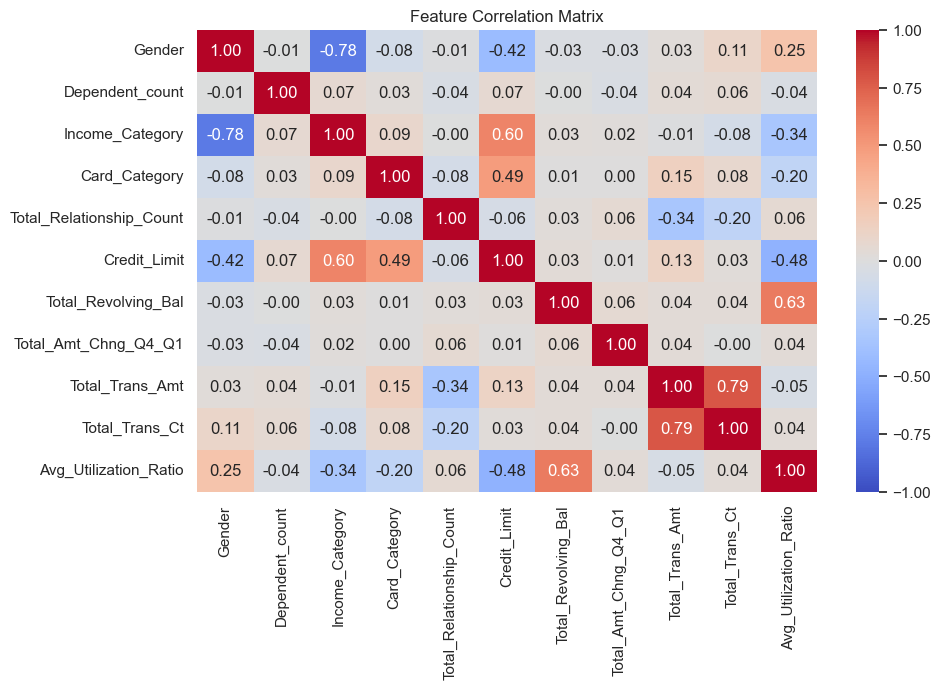

In [575]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()


In [576]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn.impute import SimpleImputer

# #first with mean
# imputer = SimpleImputer(strategy='mean')
# data_imputed = imputer.fit_transform(df)

# #convert to dataFrame
# df_imputed = pd.DataFrame(data_imputed, columns=df.columns)

# #k_means to predict lost variables
# kmeans = KMeans(n_clusters=10, random_state=42)
# clusters = kmeans.fit_predict(data_imputed)

# #adding a column for clusters
# df_imputed['cluster'] = clusters


# for feature in df.columns:
#     if df[feature].isnull().any():
#         for cluster in range(kmeans.n_clusters):
#             # set the mean
#             cluster_mean = df_imputed[df_imputed['cluster'] == cluster][feature].mean()
            
#             #replace mean with the lost one
#             df_imputed.loc[(df_imputed['cluster'] == cluster) & (df[feature].isnull()), feature] = cluster_mean

# #drop added column
# df_final = df_imputed.drop(columns=['cluster'])

# df = df_final

imputer = KNNImputer(n_neighbors=9)
df_a = imputer.fit_transform(df)
D = pd.DataFrame(df_a, columns=df.columns)
df = D


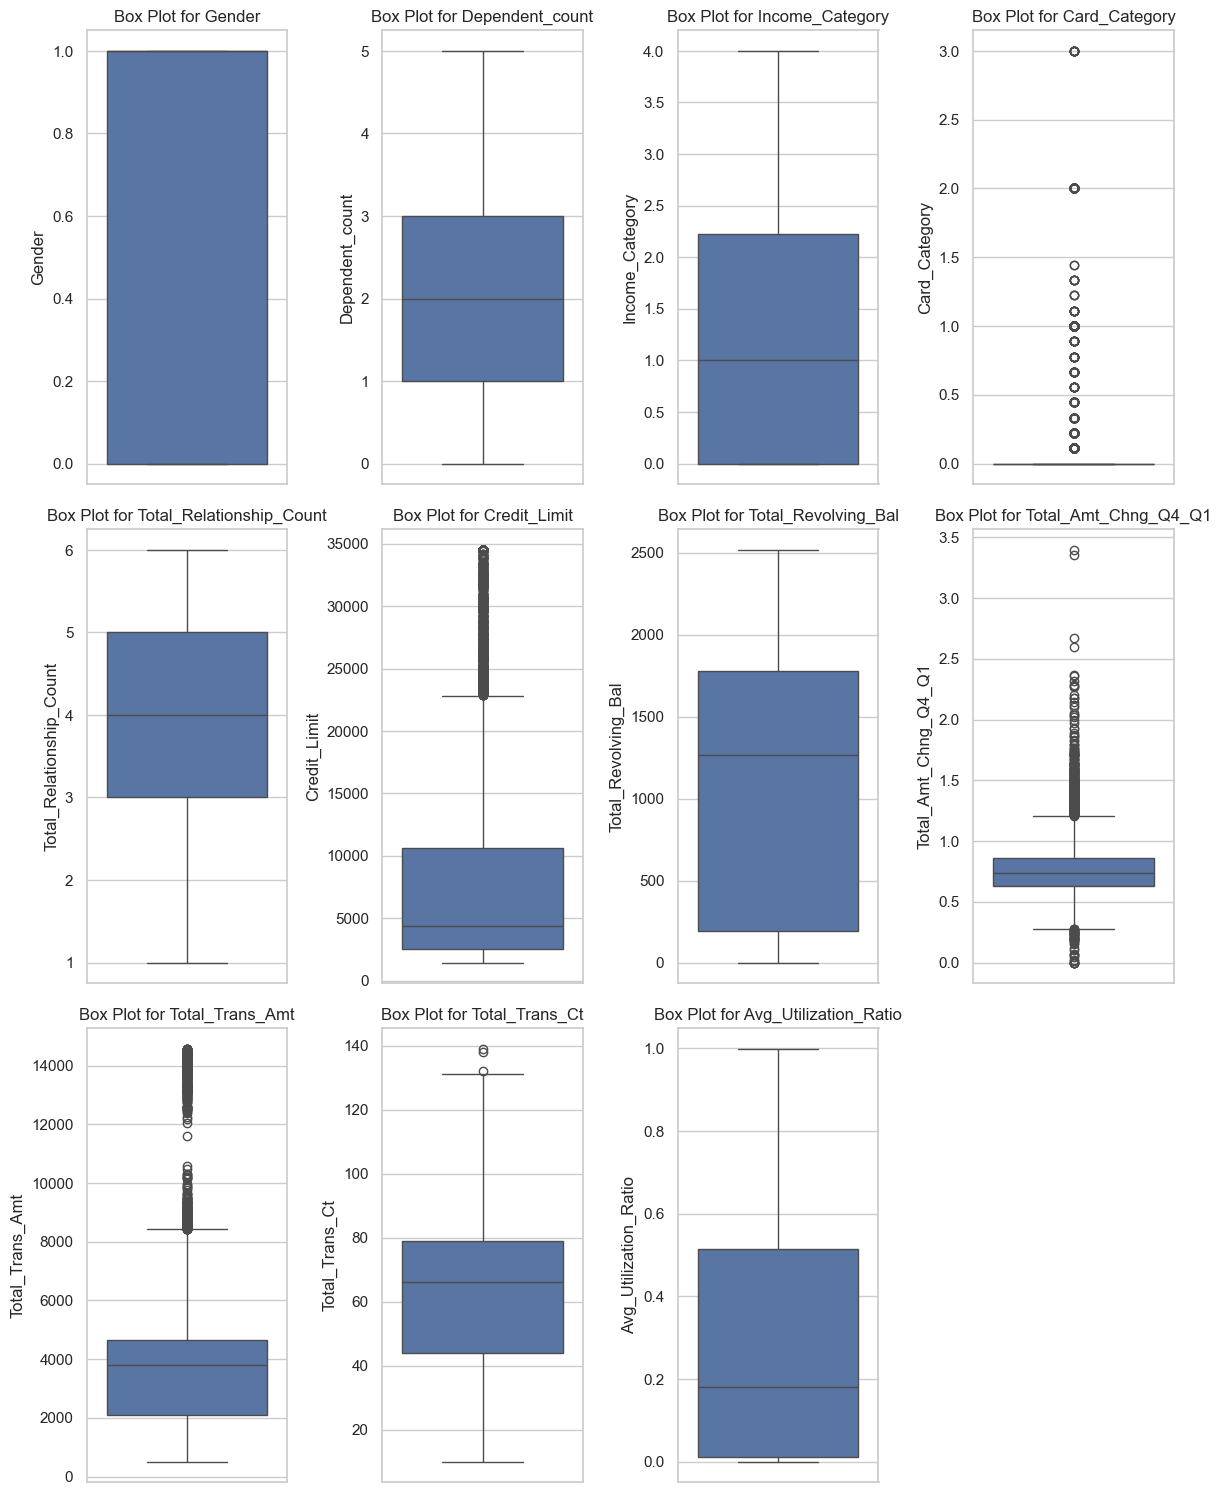

In [577]:
sns.set(style="whitegrid")

num_features = len(df.columns)
plt.figure(figsize=(12, num_features * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_features, 4, i)
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [592]:
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

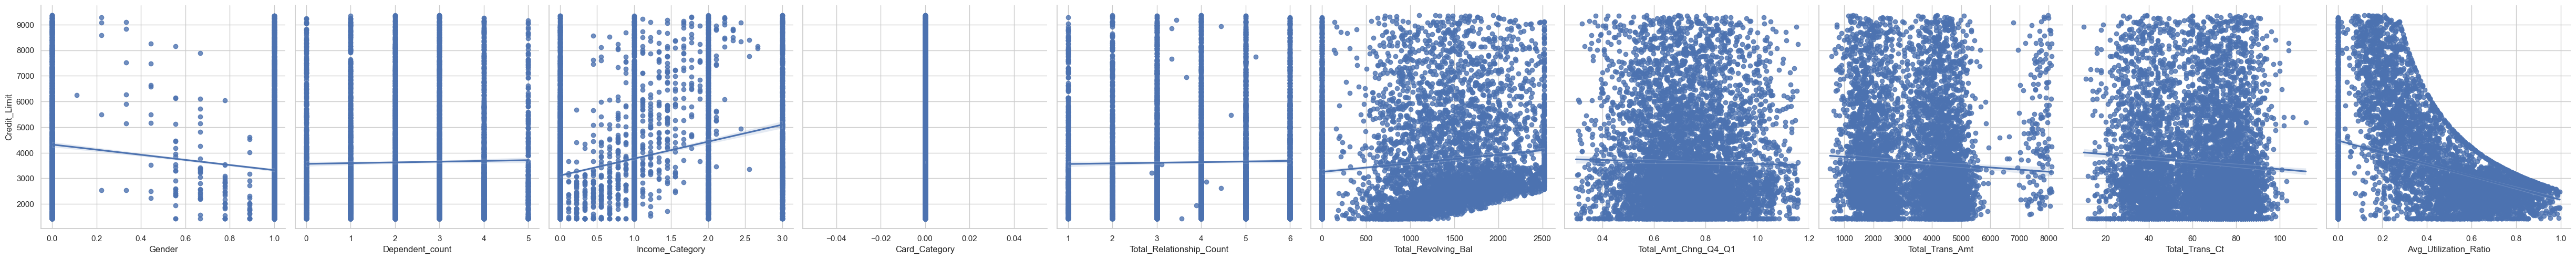

In [593]:
sns.pairplot(df, y_vars='Credit_Limit', x_vars=df.columns.drop('Credit_Limit'), kind='reg', height=5)
plt.show()

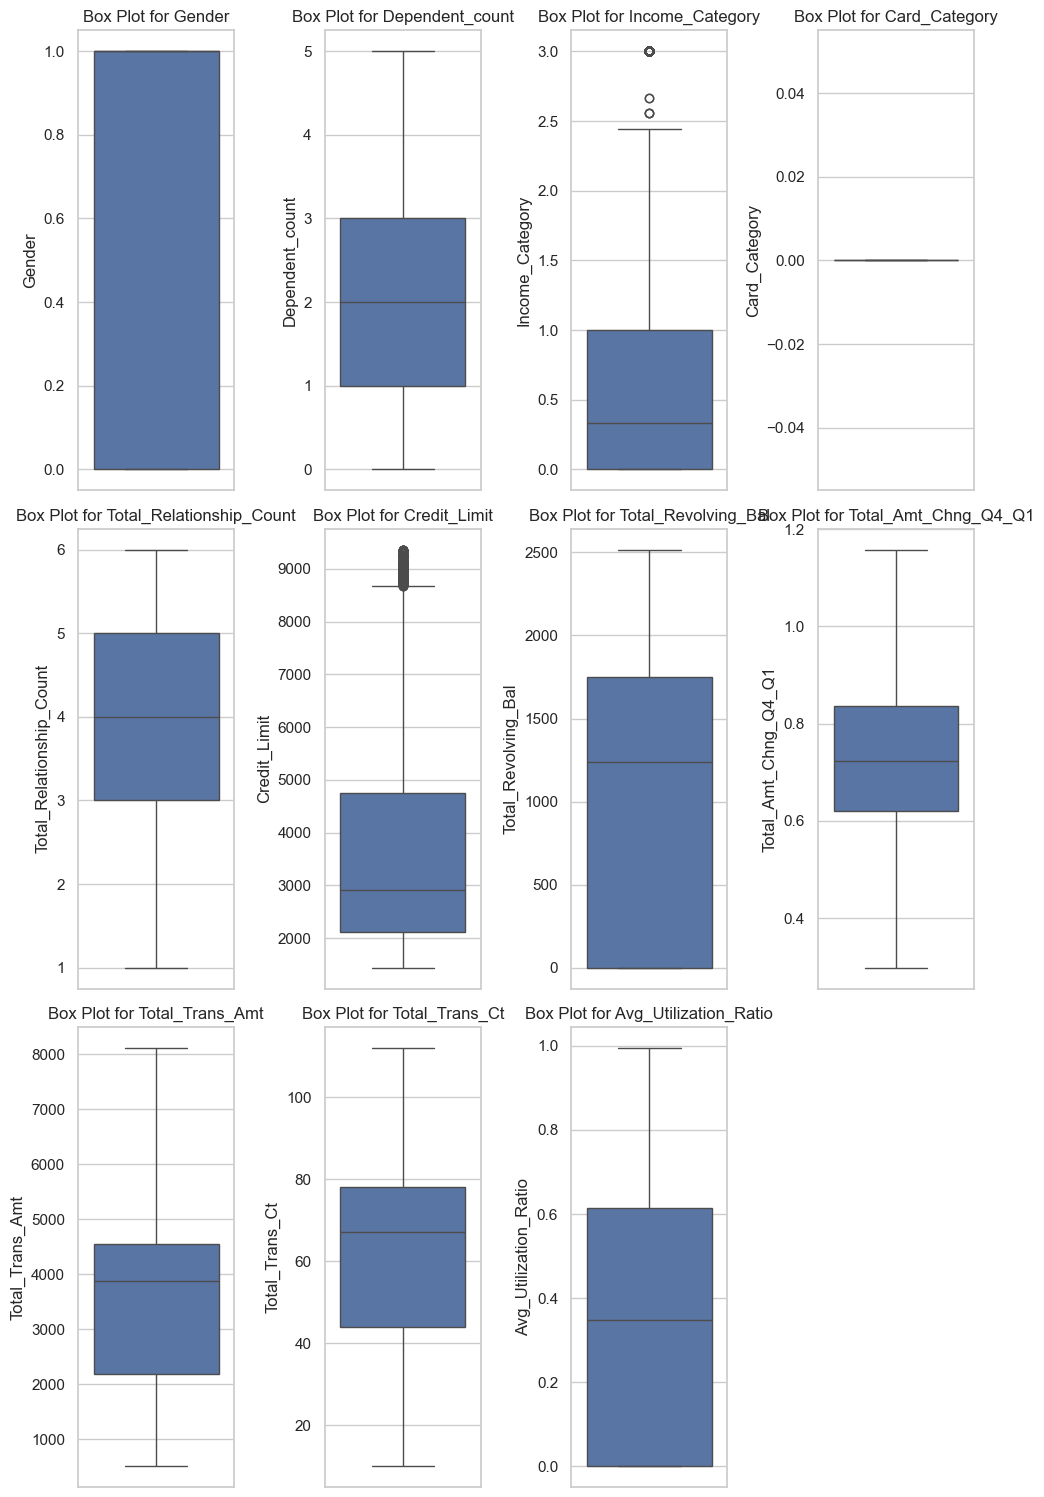

In [594]:
sns.set(style="whitegrid")

num_features = len(df.columns)
plt.figure(figsize=(10, num_features * 5))

for i, column in enumerate(df.columns, 1):
    plt.subplot(num_features, 4, i)
    sns.boxplot(data=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [595]:
# from scipy import stats

# # Box-Cox transformation
# box_cox_transformed, _ = stats.boxcox(df['Customer_Age'])
# df['Customer_Age'] = box_cox_transformed

# box_cox_transformed, _ = stats.boxcox(df['Total_Trans_Amt'])
# df['Total_Trans_Amt'] = box_cox_transformed

In [596]:
features = df.columns.difference(['Credit_Limit'])  # All columns except 'SalePrice'
target = 'Credit_Limit'

# Convert categorical features to strings
categorical_features = df[features].select_dtypes(include=['object']).columns

for feature in categorical_features:
    df[feature] = df[feature].astype(str)
 
# Split data into features and target
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find categorical features for CatBoost
categorical_features_indices = np.where(X.dtypes == 'object')[0]


In [598]:
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features_indices)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features_indices)
 
# Train the CatBoost model
model = CatBoostRegressor(
    iterations=10000,
    learning_rate=0.1,
    eval_metric='RMSE',
    logging_level='Verbose',  # Can be 'Silent' to reduce output
    use_best_model=True, nan_mode='Max')

# Train the model with evaluation
model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50  # Stops if validation RMSE doesn't improve for 50 rounds
)

0:	learn: 1922.3401149	test: 1962.0029516	best: 1962.0029516 (0)	total: 2.93ms	remaining: 29.3s
1:	learn: 1834.9227027	test: 1873.1791321	best: 1873.1791321 (1)	total: 4.36ms	remaining: 21.8s
2:	learn: 1750.6280641	test: 1781.2720482	best: 1781.2720482 (2)	total: 5.79ms	remaining: 19.3s
3:	learn: 1676.7423266	test: 1702.4135507	best: 1702.4135507 (3)	total: 7.55ms	remaining: 18.9s
4:	learn: 1604.0932558	test: 1626.3028578	best: 1626.3028578 (4)	total: 9.28ms	remaining: 18.6s
5:	learn: 1544.0657890	test: 1564.4233447	best: 1564.4233447 (5)	total: 10.8ms	remaining: 18.1s
6:	learn: 1490.4386083	test: 1507.8312016	best: 1507.8312016 (6)	total: 12.3ms	remaining: 17.6s
7:	learn: 1450.6914082	test: 1462.3301086	best: 1462.3301086 (7)	total: 14.6ms	remaining: 18.2s
8:	learn: 1403.6519820	test: 1412.5559119	best: 1412.5559119 (8)	total: 16.5ms	remaining: 18.3s
9:	learn: 1361.2709831	test: 1369.0560135	best: 1369.0560135 (9)	total: 18.1ms	remaining: 18s
10:	learn: 1323.9844346	test: 1332.7965614

In [599]:
# Make predictions on the test set
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(test_pool)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print(f'Mean squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2:.4f}')

Mean squared Error (MSE): 975809.05
R2 Score: 0.7735


In [600]:
df

,Gender,Dependent_count,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
21,1.0,0.0,0.000000,0.0,2.0,1438.3,0.0,1.047,692.0,16.0,0.000
23,1.0,4.0,0.000000,0.0,3.0,2492.0,1560.0,0.573,1126.0,23.0,0.626
25,1.0,3.0,0.000000,0.0,6.0,7768.0,1669.0,0.797,1051.0,22.0,0.215
29,0.0,4.0,1.000000,0.0,6.0,4785.0,1362.0,0.739,1045.0,38.0,0.285
30,0.0,3.0,3.000000,0.0,3.0,2753.0,1811.0,0.977,1038.0,25.0,0.658
...,...,...,...,...,...,...,...,...,...,...,...
9754,1.0,3.0,1.000000,0.0,4.0,1919.0,774.0,0.965,1505.0,33.0,0.403
9756,1.0,5.0,1.222222,0.0,6.0,4972.0,0.0,0.719,4524.0,72.0,0.000
9759,1.0,1.0,0.000000,0.0,2.0,2029.0,1074.0,0.514,4802.0,90.0,0.529
9760,0.0,0.0,2.000000,0.0,3.0,2742.0,2184.0,0.592,3829.0,72.0,0.796


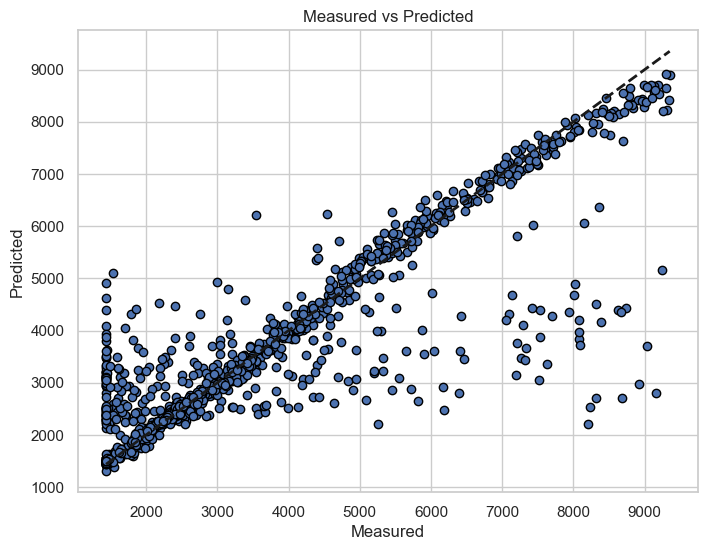

In [601]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted')
plt.show()


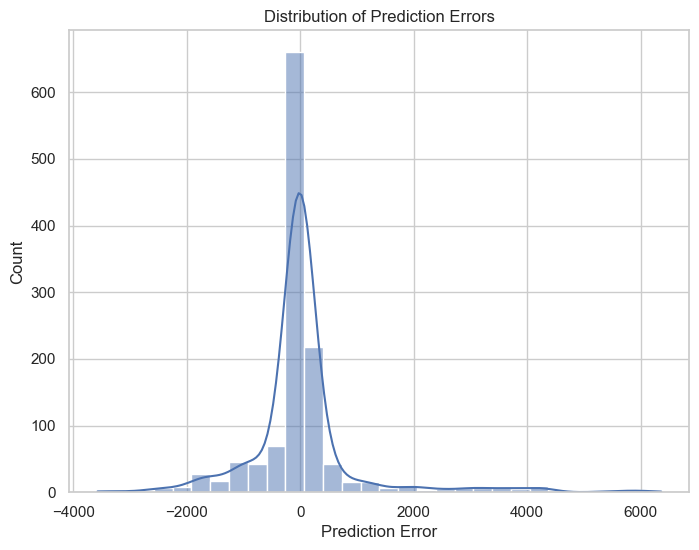

In [602]:
#error distribution
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

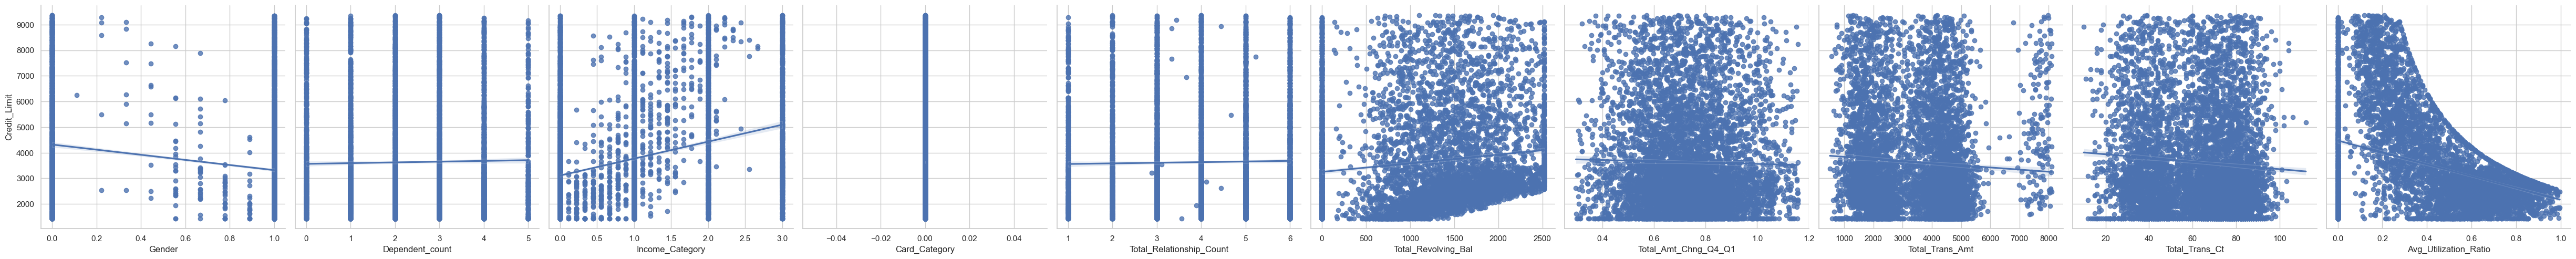

In [603]:
sns.pairplot(df, y_vars='Credit_Limit', x_vars=df.columns.drop('Credit_Limit'), kind='reg', height=5)
plt.show()